In [346]:
import pandas as pd
! pip install pyfixest -q
import pyfixest as pf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **0. Data Analysis**

# 0.1 Dataset Overview

In [347]:
path_to_data = "https://raw.githubusercontent.com/sshi24/EEMP2024_group_project_EWSS/refs/heads/main/Data/07.11.2024_Data_Python_Project_part-1-oecd-alcohol-consumption-1950-to-2015_fixed.csv"
df = pd.read_csv(path_to_data,index_col=False)

# Overview headers and shape of df
pd.set_option('display.max_columns', None)
df

,Year,Cons_pc_Beer,Cons_pc_Wine,Cons_pc_Spirits,Cons_pc_Alkohol,Exp_pc_Beer,Exp_pc_Wine,Exp_pc_Spirits,Exp_pc_Alkohol,Exp_pc_Total,Exp_pc_Residual,Prices_Beer,Prices_Wine,Prices_Spirits,Prices_Alcohol,CPI_Beer,CPI_Wine,CPI_Spirits,CPI_Alcohol,CPI_AllGoods,Population,Real_GDPPC,Cond_Bugdget_Shares_Beer,Cond_Bugdget_Shares_Wine,Cond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Beer,Uncond_Bugdget_Shares_Wine,Uncond_Bugdget_Shares_Spirits,Uncond_Bugdget_Shares_Alcohol,Volume_Shares_Beer,Volume_Shares_Wine,Volume_Shares_Spirits,Exchange_Rate,Expenditure_pc_USD_Beer,Expenditure_pc_USD_Wine,Expenditure_pc_USD_Spirits,Expenditure_pc_USD_Alcohol,Expenditure_pc_USD_Total,Expenditure_pc_USD_Residuals,Price_USD_Beer,Price_USD_Wine,Price_USD_Spirits,Price_USD_Alcohol,Country
0,1970,6.13,1.67,1.06,8.86,66.22,23.98,15.54,105.74,1560.56,1454.83,10.80,14.32,14.70,12.31,7.04,17.36,6.85,0.00,8.86,12660.16,12023.54,0.63,0.23,0.15,0.04,0.02,0.01,0.07,0.69,0.19,0.12,0.90,73.74,26.70,17.31,117.75,1737.82,1620.08,12.03,15.95,16.37,13.71,Australia
1,1971,6.15,1.35,1.10,8.60,70.16,20.47,16.18,106.81,1681.89,1575.09,11.40,15.20,14.75,12.75,7.43,18.42,6.88,0.00,9.40,12937.20,12289.52,0.66,0.19,0.15,0.04,0.01,0.01,0.06,0.72,0.16,0.13,0.88,79.72,23.26,18.39,121.37,1911.24,1789.87,12.95,17.27,16.76,14.48,Australia
2,1972,6.30,1.55,1.24,9.10,75.59,23.50,18.51,117.59,1828.79,1711.20,12.00,15.12,14.88,13.23,7.83,18.33,6.93,9.01,9.97,13177.00,12404.42,0.64,0.20,0.16,0.04,0.01,0.01,0.06,0.69,0.17,0.14,0.84,90.09,28.01,22.06,140.16,2179.73,2039.57,14.30,18.02,17.73,15.76,Australia
3,1973,6.87,1.61,1.26,9.74,89.31,24.94,23.03,137.27,2007.49,1870.21,13.00,15.52,18.23,14.36,8.48,18.81,8.50,9.76,10.87,13380.40,12878.09,0.65,0.18,0.17,0.04,0.01,0.01,0.07,0.71,0.16,0.13,0.71,126.68,35.37,32.66,194.71,2847.50,2652.79,18.44,22.01,25.85,20.37,Australia
4,1974,7.00,1.77,1.21,9.98,103.54,31.91,27.84,163.30,2352.21,2188.92,14.80,18.00,22.98,16.67,9.65,21.82,10.71,10.98,12.55,13599.10,12985.12,0.63,0.20,0.17,0.04,0.01,0.01,0.07,0.70,0.18,0.12,0.70,148.99,45.92,40.06,234.96,3384.48,3149.52,21.29,25.90,33.06,23.99,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,2010,3.09,2.26,1.85,7.21,213.28,189.55,150.06,552.89,16022.37,15469.48,68.92,83.92,81.03,77.61,94.29,90.10,85.47,88.50,89.40,62766.37,23777.16,0.39,0.34,0.27,0.01,0.01,0.01,0.03,0.43,0.31,0.26,0.65,329.41,292.76,231.77,853.94,24746.41,23892.48,106.44,129.62,125.16,119.87,UK
1076,2011,3.00,2.38,1.78,7.17,216.81,207.86,155.78,580.45,16504.98,15924.53,72.24,87.25,87.31,81.65,98.83,93.67,92.09,93.66,93.40,63258.92,24057.35,0.37,0.36,0.27,0.01,0.01,0.01,0.04,0.42,0.33,0.25,0.62,347.56,333.21,249.73,930.49,26458.37,25527.88,115.81,139.86,139.96,130.90,UK
1077,2012,2.85,2.32,1.78,6.95,208.21,203.92,159.50,571.63,16995.88,16424.25,73.17,87.71,89.78,82.93,100.10,94.17,94.70,96.30,96.10,63695.69,24174.09,0.36,0.36,0.28,0.01,0.01,0.01,0.03,0.41,0.33,0.26,0.63,329.93,323.13,252.74,905.80,26931.55,26025.75,115.95,138.99,142.27,131.41,UK
1078,2013,2.78,2.07,1.72,6.57,204.33,186.43,163.91,554.67,17599.61,17044.95,73.46,90.08,95.30,85.31,100.50,96.71,100.52,99.61,98.50,64097.09,24541.57,0.37,0.34,0.30,0.01,0.01,0.01,0.03,0.42,0.31,0.26,0.64,319.39,291.42,256.21,867.02,27510.33,26643.32,114.83,140.80,148.96,133.35,UK


### Price of Wine in USD

In [348]:
# Convert Price_USD_Wine into numeric
df.Price_USD_Wine = pd.to_numeric(df.Price_USD_Wine, errors='coerce')
df.Price_USD_Wine.describe()

,Price_USD_Wine
count,661.000000
mean,66.379864
std,50.658302
min,0.120000
25%,28.340000
50%,59.810000
75%,96.790000
max,282.170000


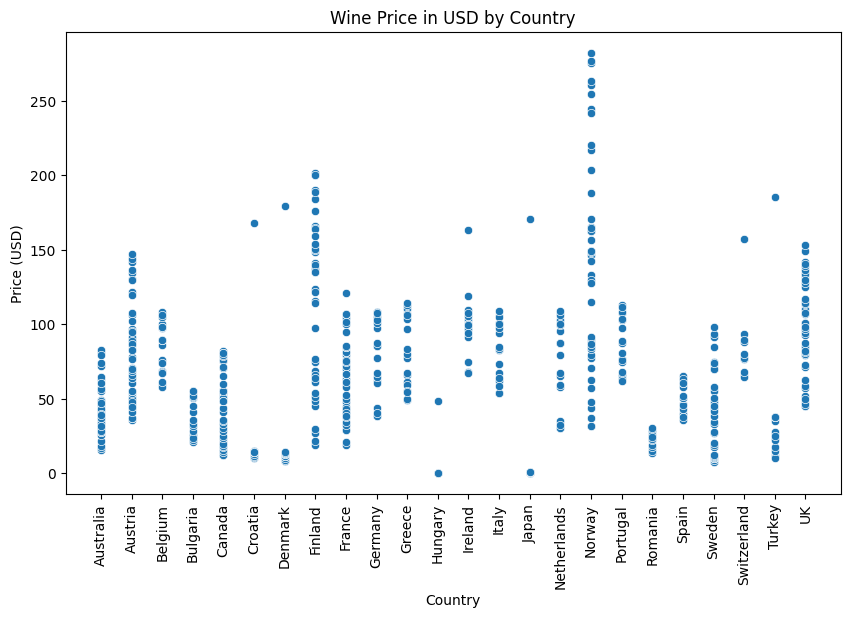

In [349]:
# Check outliers in Price_USD_Wine
## Plot Price_USD_Wine by Country in a scatter plot

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Country', y='Price_USD_Wine', data=df)
plt.xticks(rotation=90)
plt.title('Wine Price in USD by Country')
plt.xlabel('Country')
plt.ylabel('Price (USD)')
plt.show()

In [350]:
dfagg_p = df[df.Price_USD_Wine.isnull()==False].copy()

# Convert Price_USD_Wine to numeric, forcing non-numeric entries to NaN
#dfagg_p['Price_USD_Wine'] = pd.to_numeric(dfagg_p['Price_USD_Wine'], errors='coerce')

# Group by 'Country' and calculate the mean of 'Price_USD_Wine', then reset index
dfagg_p = dfagg_p.groupby('Country', as_index=False)['Price_USD_Wine'].mean()

# Sort values of 'Price_USD_Wine'
dfagg_p.sort_values('Price_USD_Wine', ascending=False)

,Country,Price_USD_Wine
16,Norway,145.068222
7,Finland,117.298140
12,Ireland,100.196316
23,UK,99.311556
17,Portugal,86.465789
21,Switzerland,86.038000
2,Belgium,85.036316
1,Austria,84.594444
10,Greece,82.538421
13,Italy,80.181579


<Axes: xlabel='Price_USD_Wine', ylabel='Country'>

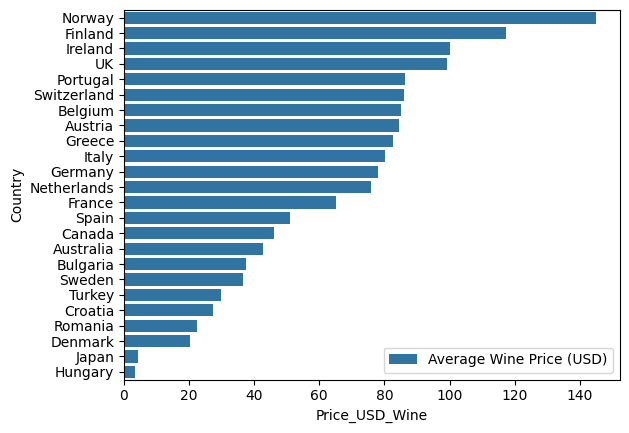

In [351]:
# plot in bar chart
sns.barplot(dfagg_p.sort_values('Price_USD_Wine', ascending=False), y='Country', x='Price_USD_Wine', label='Average Wine Price (USD)')

### Wine Consumption per capita

In [352]:
# Sort average yearly Wine Consumption per capita by country
dfagg_cons = df.groupby('Country').Cons_pc_Wine.mean().reset_index()
dfagg_cons.sort_values('Cons_pc_Wine', ascending=False)

,Country,Cons_pc_Wine
8,France,8.039111
17,Portugal,7.682000
13,Italy,7.395111
5,Croatia,4.943571
21,Switzerland,4.608444
19,Spain,4.575778
1,Austria,4.575778
10,Greece,3.859111
11,Hungary,3.507111
2,Belgium,3.258667


<Axes: xlabel='Cons_pc_Wine', ylabel='Country'>

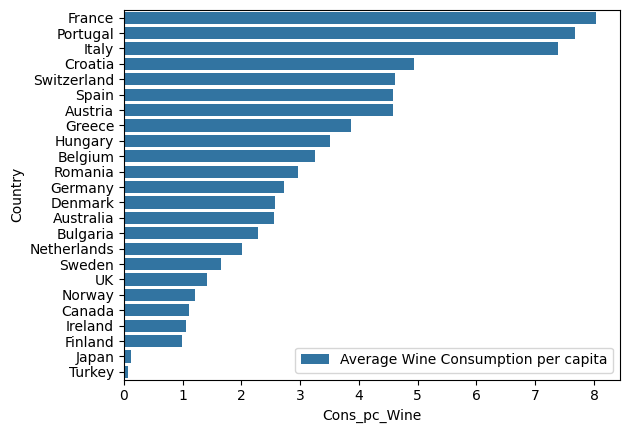

In [353]:
# Plot in a bar chart
sns.barplot(dfagg_cons.sort_values('Cons_pc_Wine', ascending=False), y='Country', x='Cons_pc_Wine', label='Average Wine Consumption per capita') # need to be improved

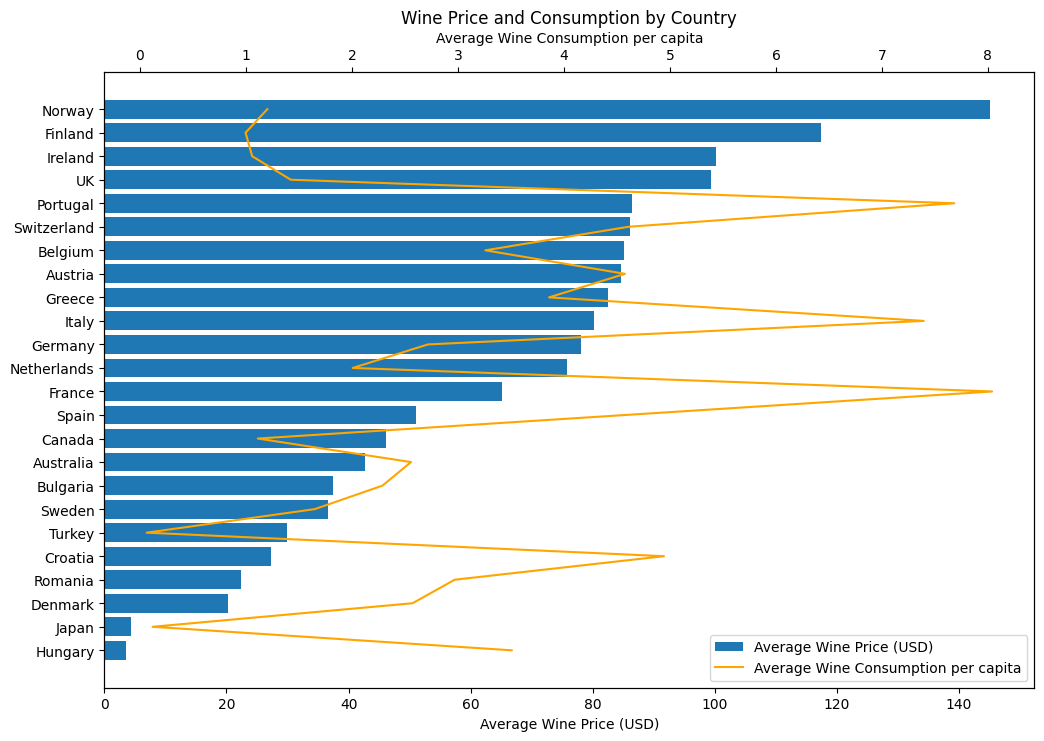

In [354]:
# Sort dfagg_p by Price_USD_Wine in descending order
dfagg_p_sorted = dfagg_p.sort_values('Price_USD_Wine', ascending=True)

# Get the order of countries based on Price_USD_Wine
country_order = dfagg_p_sorted['Country'].tolist()

# Filter dfagg_cons to include only countries present in country_order
dfagg_cons_filtered = dfagg_cons[dfagg_cons['Country'].isin(country_order)]

# Reorder dfagg_cons_filtered based on country_order
dfagg_cons_ordered = dfagg_cons_filtered.set_index('Country').loc[country_order].reset_index()


fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot Price_USD_Wine as a bar chart on the left axis
ax1.barh(dfagg_p_sorted['Country'], dfagg_p_sorted['Price_USD_Wine'], label='Average Wine Price (USD)')
ax1.set_xlabel('Average Wine Price (USD)')

# Create a secondary y-axis on the right
ax2 = ax1.twiny()

# Plot Cons_pc_Wine as a line chart on the right axis, using the same y-axis order as Cons_pc_Wine
ax2.plot(dfagg_cons_ordered['Cons_pc_Wine'], dfagg_cons_ordered['Country'], color='orange', label='Average Wine Consumption per capita')
ax2.set_xlabel('Average Wine Consumption per capita')

# Set the title of the plot
plt.title('Wine Price and Consumption by Country')

# Add a legend for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right')

# Show the plot
plt.show()

# 0.2 Subset of Canada and Italy

In [355]:
# Create a subset of the DataFrame with only data for Canada and Italy
dfs = df[df['Country'].isin(['Canada', 'Italy'])]

# **1. Regression Analysis**

# 1.1 Basic Regressions

In [356]:
# Run Regressions. Use subset.
reg1 = pf.feols('Cons_pc_Wine~CPI_Wine', data=dfs)
reg2 = pf.feols('CPI_Wine~Price_USD_Wine', data=dfs)
reg3 = pf.feols('Price_USD_Wine~Cons_pc_Wine', data=dfs)

pf.etable([reg1,reg2,reg3])

GT(_tbl_data=  level_0         level_1                    0                       1  \
0    coef        CPI_Wine  0.023* <br> (0.009)                           
1    coef  Price_USD_Wine                        0.797*** <br> (0.067)   
2    coef    Cons_pc_Wine                                                
3    coef       Intercept   0.633 <br> (0.692)  26.693*** <br> (4.141)   
4   stats    Observations                   64                      64   
5   stats       S.E. type                  iid                     iid   
6   stats   R<sup>2</sup>                0.092                   0.695   

                        2  
0                          
1                          
2   8.187*** <br> (1.415)  
3  37.584*** <br> (4.154)  
4                      64  
5                     iid  
6                   0.351  , _body=<great_tables._gt_data.Body object at 0x7f806c6aa110>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f806c5e9c30>, _spanners=Spanners([SpannerInfo(spanner_id='Cons_pc_Wine', spanner_level=1, spanner_label='Cons_pc_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None), SpannerInfo(spanner_id='CPI_Wine', spanner_level=1, spanner_label='CPI_Wine', spanner_units=None, spanner_pattern=None, vars=['1'], built=None), SpannerInfo(spanner_id='Price_USD_Wine', spanner_level=1, spanner_label='Price_USD_Wine', spanner_units=None, spanner_pattern=None, vars=['2'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f806c5eb130>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scs

**Interpretation:**
1. When CPI (=Inflation rate) increases by 1, the Consumption increases by 0.023. Typically one expects weeker consumption with higher inflation.
2. When Prices increase, CPI increases by 0.797. This is intuitive as higher prices directly result in higher CPI
3. When Consumption increases, prices increase by 8.187. This can reflect demand/ supply adjustments of the market.

In [357]:
# Statistical analysis Regression 3
reg3.tidy()

,Estimate,Std. Error,t value,Pr(>|t|),2.5%,97.5%
Coefficient,,,,,,
Intercept,37.584171,4.153725,9.048306,6.141754e-13,29.280994,45.887348
Cons_pc_Wine,8.187457,1.415008,5.786154,2.550851e-07,5.358895,11.016018


**Interpretation Statistical Tests:**

*   Standard error: how much do the results vary if we draw different samples?
*   **Standard error = 1.41**


*   H0:there is no connection between X (Consc_pc_Wine) and Y (Price_USD_Wine)
*   T-value= beta_head/ SE= 8.19/1,41=5,80
***t-value is larger than 1,96 hence at a significance level of 5% the H0 can be rejected**


*   95% Confidence band: in 95% of the samples the 95% CI will include the true value
*   CI= 8,18 +/- 2*1,41= [5,35/11,01]
***does not include 0 hence H0 can be rejected**




# 1.2 Dummy Variable

In [358]:
## Determine share of countries that prefer wine
df['Volume_Shares_Wine'] = pd.to_numeric(df['Volume_Shares_Wine'], errors='coerce')

# Calculate the average Volume_Shares_Wine for each country
avg_volume_shares_wine = df.groupby('Country')['Volume_Shares_Wine'].mean()
avg_volume_shares_wine2 = dfs.groupby('Country')['Volume_Shares_Wine'].mean()

# Create a new column 'dummy_high_wine_consumption' with 1 if the average Volume_Shares_Wine is >= 0.33, 0 otherwise
df['dummy_wine_preference'] = 0
df.loc[df['Country'].isin(avg_volume_shares_wine[avg_volume_shares_wine >= 0.33].index), 'dummy_wine_preference'] = 1

dfs =dfs.copy()
dfs['dummy_wine_preference'] = 0
dfs.loc[dfs['Country'].isin(avg_volume_shares_wine2[avg_volume_shares_wine2 >= 0.33].index), 'dummy_wine_preference'] = 1

# Show proportion of countries that prefer wine
df.dummy_wine_preference.value_counts(normalize=True)

,proportion
dummy_wine_preference,
0,0.625
1,0.375


**Interpretation:**
The ratio of countries with wine preference vs. no wine preference is approx. 60:40

# 1.3 Interaction effect


In [359]:
reg1 = pf.feols('Prices_Wine ~ Cons_pc_Wine*dummy_wine_preference', data=dfs)
pf.etable([reg1])

GT(_tbl_data=  level_0                             level_1                         0
0    coef                        Cons_pc_Wine    62.656*** <br> (7.358)
1    coef               dummy_wine_preference  118.813*** <br> (24.134)
2    coef  Cons_pc_Wine:dummy_wine_preference   -70.562*** <br> (8.594)
3    coef                           Intercept      -13.645 <br> (8.457)
4   stats                        Observations                        64
5   stats                           S.E. type                       iid
6   stats                       R<sup>2</sup>                     0.575, _body=<great_tables._gt_data.Body object at 0x7f806c419000>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f806c5d15d0>, _spanners=Spanners([SpannerInfo(spanner_id='Prices_Wine', spanner_level=1, spanner_label='Prices_Wine', spanner_units=None, spanner_pattern=None, vars=['0'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f806c5d3af0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_bottom_color=OptionsInfo(scss=True, catego

**Interpretation:**
Wine consumption and wine preference significant predictors of wine prices.

**dummy_wine_preference:** For countries with average wine consumption of 33% or more (dummy_wine_preference = 1), wine prices are on average ~119 units higher compared to countries with average wine consumption less than 33% (dummy_wine_preference = 0) when wine consumption is held at 0.

**Interaction effect:** The relationship between consumption and price is different for countries with higher wine consumption compared to countries with lower average consumption. For countries with avg wine consumption of 33% and more, the effect of Cons_pc_Wine on Prices_Wine is reduced by ~70 units compared to countries with average wine consumption less than 33%


# 1.4 Good and Bad Control Variables

In [360]:
# Good control variables
reg1 = pf.feols('CPI_Wine~Price_USD_Wine', data=dfs)
reg2 = pf.feols('CPI_Wine~Price_USD_Wine+Real_GDPPC', data=dfs)

pf.etable([reg1,reg2])

GT(_tbl_data=  level_0         level_1                       0                        1
0    coef  Price_USD_Wine   0.797*** <br> (0.067)    0.490*** <br> (0.046)
1    coef      Real_GDPPC                            0.004*** <br> (0.000)
2    coef       Intercept  26.693*** <br> (4.141)  -30.936*** <br> (5.499)
3   stats    Observations                      64                       64
4   stats       S.E. type                     iid                      iid
5   stats   R<sup>2</sup>                   0.695                    0.905, _body=<great_tables._gt_data.Body object at 0x7f806c3618a0>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f806c32ef50>, _spanners=Spanners([SpannerInfo(spanner_id='CPI_Wine', spanner_level=1, spanner_label='CPI_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f806c32f1c0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value=

**Interpretation:**

**Regression 1:**
Price_USD_Wine: A one-unit increase in wine price is associated with a ~0.8 unit increase in CPI_Wine

**Regression 2:**
Price_USD_Wine: The effect of wine price on CPI_Wine is ~0.5.
Real_GDPPC: Has a statistically significant effect and reduces standard error.

**Add Real_GDPPC as control variable.**


In [361]:
# bad control variables
reg1 = pf.feols('CPI_Wine~Price_USD_Wine', data=dfs)
reg2 = pf.feols('CPI_Wine~Price_USD_Wine+Cons_pc_Wine', data=dfs)

pf.etable([reg1,reg2])

GT(_tbl_data=  level_0         level_1                       0                       1
0    coef  Price_USD_Wine   0.797*** <br> (0.067)   0.963*** <br> (0.076)
1    coef    Cons_pc_Wine                          -3.869*** <br> (1.048)
2    coef       Intercept  26.693*** <br> (4.141)  26.183*** <br> (3.777)
3   stats    Observations                      64                      64
4   stats       S.E. type                     iid                     iid
5   stats   R<sup>2</sup>                   0.695                   0.751, _body=<great_tables._gt_data.Body object at 0x7f806c6a8880>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f806c41b5b0>, _spanners=Spanners([SpannerInfo(spanner_id='CPI_Wine', spanner_level=1, spanner_label='CPI_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f806c5d03d0>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_top_color=OptionsInfo(scss=True, category='table', type='value', value='#A8A8A8'), table_border_right_style=OptionsInfo(scss=True, category='table', type='value', value='none'), table_border_right_width=OptionsInfo(scss=True, category='table', type='px', value='2px'), table_border_right_color=OptionsInfo(scss=True, category='table', type='value', value='#D3D3D3'), table_border_bottom_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_bottom_style=OptionsInfo(scss=True, category='table', type='value', value='hidden'), table_border_bottom_width=OptionsInfo(scss=True, category='table', type='px', value='2px'),

**Interpretation:**
Consumption has an impact on price (see regression 3 in Chapter 'Regressions'). Hence, if consumption changes, it does not only impact CPI on the left side of the equation but als price on the right side.

# 1.5 Fixed Effects

In [362]:
# Add fixed effect due to panel data
reg3 = pf.feols('Price_USD_Wine~Cons_pc_Wine', data=dfs)
reg4_1 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Year ', data=dfs)
reg4_2 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Country', data=dfs)
reg4_3 = pf.feols('Price_USD_Wine ~ Cons_pc_Wine | Year + Country', data=dfs)

pf.etable([reg3, reg4_1, reg4_2, reg4_3])

GT(_tbl_data=  level_0        level_1                       0                      1  \
0    coef   Cons_pc_Wine   8.187*** <br> (1.415)  3.786*** <br> (0.617)   
1    coef      Intercept  37.584*** <br> (4.154)                          
2      fe           Year                       -                      x   
3      fe        Country                       -                      -   
4   stats   Observations                      64                     64   
5   stats      S.E. type                     iid               by: Year   
6   stats  R<sup>2</sup>                   0.351                  0.966   

                     2                    3  
0  1.068 <br> (32.256)  -2.960 <br> (2.503)  
1                                            
2                    -                    x  
3                    x                    x  
4                   64                   64  
5          by: Country             by: Year  
6                0.369                0.977  , _body=<great_tables._gt_data.Body object at 0x7f806c692d70>, _boxhead=Boxhead([ColInfo(var='level_0', type=<ColInfoTypeEnum.row_group: 3>, column_label='level_0', column_align='center', column_width=None), ColInfo(var='level_1', type=<ColInfoTypeEnum.stub: 2>, column_label='level_1', column_align='center', column_width=None), ColInfo(var='0', type=<ColInfoTypeEnum.default: 1>, column_label='(1)', column_align='center', column_width=None), ColInfo(var='1', type=<ColInfoTypeEnum.default: 1>, column_label='(2)', column_align='center', column_width=None), ColInfo(var='2', type=<ColInfoTypeEnum.default: 1>, column_label='(3)', column_align='center', column_width=None), ColInfo(var='3', type=<ColInfoTypeEnum.default: 1>, column_label='(4)', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x7f807427f6d0>, _spanners=Spanners([SpannerInfo(spanner_id='Price_USD_Wine', spanner_level=1, spanner_label='Price_USD_Wine', spanner_units=None, spanner_pattern=None, vars=['0', '1', '2', '3'], built=None)]), _heading=Heading(title=None, subtitle=None, preheader=None), _stubhead=None, _source_notes=['Significance levels: * p < 0.05, ** p < 0.01, *** p < 0.001. Format of coefficient cell:\nCoefficient \n (Std. Error)'], _footnotes=[], _styles=[], _locale=<great_tables._gt_data.Locale object at 0x7f806c692410>, _formats=[], _substitutions=[], _options=Options(table_id=OptionsInfo(scss=False, category='table', type='value', value=None), table_caption=OptionsInfo(scss=False, category='table', type='value', value=None), table_width=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_layout=OptionsInfo(scss=True, category='table', type='value', value='fixed'), table_margin_left=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_margin_right=OptionsInfo(scss=True, category='table', type='px', value='auto'), table_background_color=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_additional_css=OptionsInfo(scss=False, category='table', type='values', value=[]), table_font_names=OptionsInfo(scss=False, category='table', type='values', value=['-apple-system', 'BlinkMacSystemFont', 'Segoe UI', 'Roboto', 'Oxygen', 'Ubuntu', 'Cantarell', 'Helvetica Neue', 'Fira Sans', 'Droid Sans', 'Arial', 'sans-serif']), table_font_size=OptionsInfo(scss=True, category='table', type='px', value='16px'), table_font_weight=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_style=OptionsInfo(scss=True, category='table', type='value', value='normal'), table_font_color=OptionsInfo(scss=True, category='table', type='value', value='#333333'), table_font_color_light=OptionsInfo(scss=True, category='table', type='value', value='#FFFFFF'), table_border_top_include=OptionsInfo(scss=False, category='table', type='boolean', value=True), table_border_top_style=OptionsInfo(scss=True, category='table', type='value', value='solid'), table_border_top_width=OptionsInfo(scss=True, category

**Interpretation:**

Add Year as fixed effect: Control for year-specific factors that could affect consumption and prices
--> standard error decreases

Add Country as fixed effect to control for country-specific changes that could affect consumption and prices
--> no significant effect



# **2. Predictions and Machine Learning**

# 2.1 Decision Tree

In [363]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

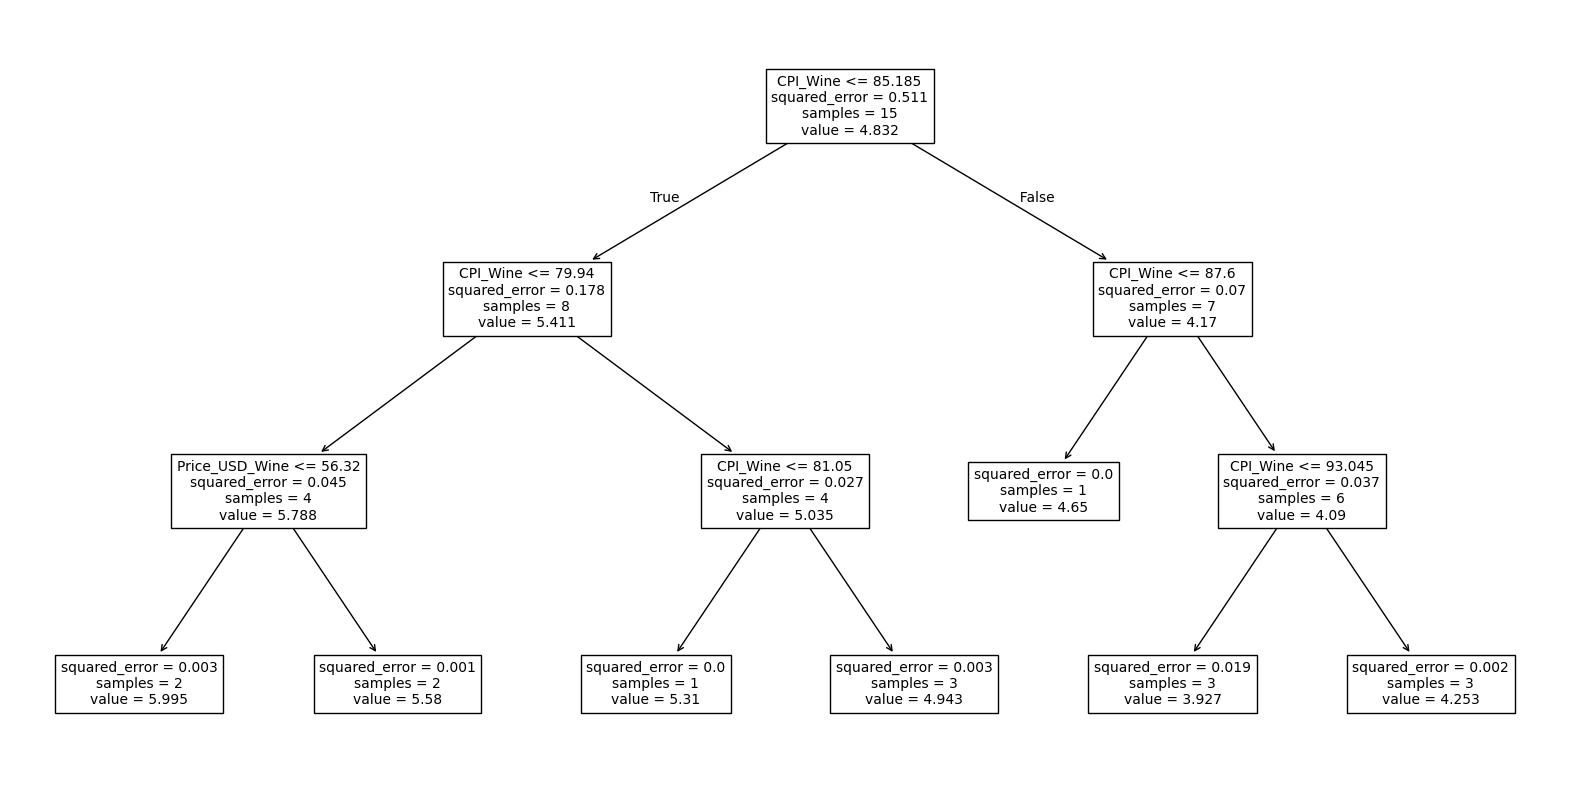

In [364]:
## Training an algorithm that predicts CPI

# Remove all NaN values
dfna=dfs.dropna()

# Define y vector and feature matrix
y=dfna['Cons_pc_Wine']
X=dfna[['CPI_Wine', 'Price_USD_Wine']]

# Fit and plot Decision Tree
dtree=DecisionTreeRegressor(max_depth=3).fit(X,y)

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns,fontsize=10)
plt.show()

In [365]:
# Mean squared error and r2 of this prediction
mse=mean_squared_error(y,dtree.predict(X))
print(mse)

r2=r2_score(y,dtree.predict(X))
print(r2)

0.005256666666666656
0.9897133031711989


**Interpretation:**
tbd

# 2.2 Split Train and Test Data

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
## Split Training and Test Data

# Split, so that the training test should comprise 70% of the observations
X_train, X_test, y_train, y_test=train_test_split(X, y, train_size=0.7, random_state=156)

In [368]:
# Train the decision tree on the training set with a depth of 2 and calculate the respective R2
dtree=DecisionTreeRegressor(max_depth=2).fit(X_train, y_train)
r2_train= r2_score(y_train, dtree.predict(X_train))
r2_test= r2_score(y_test, dtree.predict(X_test))
print('training R2:', r2_train)
print('test R2:', r2_test)

training R2: 0.9708066825520996
test R2: 0.5275255515121964


In [369]:
# Train the decision tree on the training set with a depth of 3 and calculate the respective R2
dtree=DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
r2_train= r2_score(y_train, dtree.predict(X_train))
r2_test= r2_score(y_test, dtree.predict(X_test))
print('training R2:', r2_train)
print('test R2:', r2_test)

training R2: 0.9987795826172551
test R2: 0.6385244545818602


**Interpretation:**

R2 on the test data is smaller because with training data, the algorithms might pick up sth that is only there by chance. So in reality the fit is weaker.

How does depth impact R2? tbc

# 2.3 Random Forest


In [370]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

In [371]:
# Fit the Random Forest with 100 trees to be estimated
forest = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
max_features='sqrt'

In [372]:
# Perform estimation of feature importance
perm_importance=permutation_importance(forest, X_test, y_test, n_repeats=30, random_state=156)

In [373]:
# Obtain the feature importance
perm_importance.importances_mean

array([0.84919235, 0.27136042])

<Axes: >

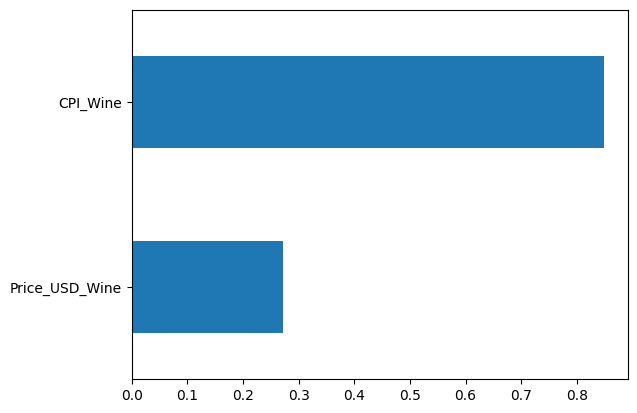

In [374]:
# Plot feature importance
pd.Series(perm_importance.importances_mean, index=X_train.columns).sort_values().plot(kind='barh')

**Interpretation:**

CPI_Wine is most important for prediction of consumption

In [375]:
from sklearn.inspection import PartialDependenceDisplay

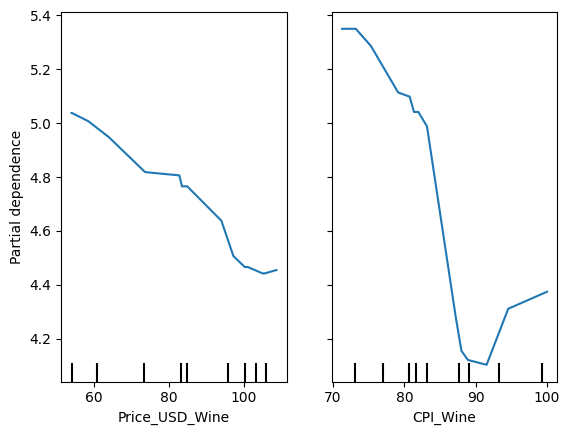

In [376]:
# Understand how the feature matter
PartialDependenceDisplay.from_estimator(forest,X,['Price_USD_Wine','CPI_Wine'])

**Interpretation:**
1. If Price_USD_Wine increase, Consumption decreases
2. If CPI_Wine (i.e. Inflation) increases, consumption decreases until a certain point

# 2.4 Lasso

In [377]:
from sklearn.linear_model import LassoCV

In [378]:
# Fit Lasso regression and print coefficient names and values
lasso = LassoCV(cv=5).fit(X_train, y_train)
print(pd.Series(lasso.coef_, index=X_train.columns))

CPI_Wine         -0.049426
Price_USD_Wine   -0.014627
dtype: float64


In [379]:
print('Alpha=',lasso.alpha_)

Alpha= 0.010010027


In [380]:
r2_test= r2_score(y_test, lasso.predict(X_test))
print(r2_test)

0.8892046893288292


**Interpretation:**
1. rather low value of alpha indicates weaker punishment for deviating from zero
2. R2 is higher than previously calculated values